### Table of Contents:
- [Hypothesis](#Hypothesis)
- [Data Wrangling](#Data-Wrangling)
    - Data Ingestion + Data Modifications (Cleaning + Filtering)
- [Analysis + Insights](#ANALYSIS)
    - [Hypothesis #1](#Hypothesis-#1)
    - [Hypothesis #2](#Hypothesis-#2)
    - [Hypothesis #3](#Hypothesis-#3)
    - [Hypothesis #4](#Hypothesis-#4)
- [Challenges Encountered](#Challenges-Encountered)
- [Conclusion / Key Takeaways](#Conclusion-/-Key-Takeaways)
- [Future Analysis/Refinements](#Future-Analysis/Refinements)

### Hypothesis

Despite the number of trips decreasing MoM due to COVID, I expect to see:
1. Trips drop in March due to the WFH protocol
2. Trips to increase again in June, as that's when NYC begins to reopen and enter Phase 1 (6/8) + Phase 2 (6/22)
3. The average trip distance and total amount to increase, as people would potentially prefer taking taxis over public transportation
4. Single passengers to show an increase MoM vs. Group riders due to social distancing measures

----

### Data Wrangling

Brief description of Filtering/Cleaning Steps:

*Note: Due to the large data files, the CSVs are not attached to the repo. However, the data can be found at the [NYC Yellow Taxi Trip Records 2020](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page) -- Jan 2020 - Jun 2020*

- Converted `tpep_pickup_datetime` to datetime
- Converted `passenger_count`, `RatecodeID`, `payment_type` to category 
- Filtered out for:
    - Approprate Date Range (1/1/20 - 6/30/20), as there were some date outliers
    - Credit or Cash payment types (Types 1 or 2)
    - Passenger counts 1-6
    - Total amounts > 0
    - Trip distance > 0

In [1]:
# import the relevant Data Analysis + Data Visualization packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# read in each month's file and concat into a holistic variable

jan2020 = pd.read_csv('data/yellow_tripdata_2020-01.csv', low_memory=False)
feb2020 = pd.read_csv('data/yellow_tripdata_2020-02.csv', low_memory=False)
mar2020 = pd.read_csv('data/yellow_tripdata_2020-03.csv', low_memory=False)
apr2020 = pd.read_csv('data/yellow_tripdata_2020-04.csv', low_memory=False)
may2020 = pd.read_csv('data/yellow_tripdata_2020-05.csv', low_memory=False)
jun2020 = pd.read_csv('data/yellow_tripdata_2020-06.csv', low_memory=False)

taxi2020 = pd.concat([jan2020, feb2020, mar2020, apr2020, may2020, jun2020])

print(taxi2020.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')


In [3]:
# sample view of data

taxi2020.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [4]:
# drop columns not needed to answer hypothesis and unnecessary for analyzation

taxi2020 = taxi2020.drop(labels = ['VendorID', 'tpep_dropoff_datetime', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'PULocationID', 'fare_amount', 'extra', 'mta_tax', 
                                   'tip_amount', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge'], axis = 1)

taxi2020.columns

Index(['tpep_pickup_datetime', 'passenger_count', 'trip_distance',
       'RatecodeID', 'payment_type', 'total_amount'],
      dtype='object')

In [5]:
# double check to ensure columns have been dropped

taxi2020.head()

,tpep_pickup_datetime,passenger_count,trip_distance,RatecodeID,payment_type,total_amount
0,2020-01-01 00:28:15,1.0,1.2,1.0,1.0,11.27
1,2020-01-01 00:35:39,1.0,1.2,1.0,1.0,12.30
2,2020-01-01 00:47:41,1.0,0.6,1.0,1.0,10.80
3,2020-01-01 00:55:23,1.0,0.8,1.0,1.0,8.16
4,2020-01-01 00:01:58,1.0,0.0,1.0,2.0,4.80


In [6]:
# check the data types of each column

taxi2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16847778 entries, 0 to 549759
Data columns (total 6 columns):
 #   Column                Dtype  
---  ------                -----  
 0   tpep_pickup_datetime  object 
 1   passenger_count       float64
 2   trip_distance         float64
 3   RatecodeID            float64
 4   payment_type          float64
 5   total_amount          float64
dtypes: float64(5), object(1)
memory usage: 899.8+ MB


In [7]:
# convert datetime to datetime data type

taxi2020['tpep_pickup_datetime'] = pd.to_datetime(taxi2020['tpep_pickup_datetime'])

In [8]:
# double check the data types of each column

taxi2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16847778 entries, 0 to 549759
Data columns (total 6 columns):
 #   Column                Dtype         
---  ------                -----         
 0   tpep_pickup_datetime  datetime64[ns]
 1   passenger_count       float64       
 2   trip_distance         float64       
 3   RatecodeID            float64       
 4   payment_type          float64       
 5   total_amount          float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 899.8 MB


In [9]:
# check the amount, if any, null values in data

taxi2020.isna().sum()

tpep_pickup_datetime         0
passenger_count         280883
trip_distance                0
RatecodeID              280883
payment_type            280883
total_amount                 0
dtype: int64

In [10]:
# drop rows where passenger_count is null because this trip would be unnecessary for our analyzation. we want records with people taking a trip

taxi2020.dropna(subset=['passenger_count'], inplace = True)

In [11]:
# double check to ensure there are no more null values in data

taxi2020.isna().sum()

tpep_pickup_datetime    0
passenger_count         0
trip_distance           0
RatecodeID              0
payment_type            0
total_amount            0
dtype: int64

In [12]:
# drop records where passenger count = 0 (we want records with people taking a trip) or is > 6 (maybe no more than 4 or 5 depending on how large file gets)
# The maximum amount of passengers allowed in a yellow taxicab by law is four (4) in a four (4) passenger taxicab or five (5) passengers in a five (5) passenger taxicab, 
# except that an additional passenger must be accepted if such passenger is under the age of seven (7) and is held on the lap of an adult passenger seated in the rear.

taxi2020['passenger_count'].value_counts()

1.0    12025880
2.0     2386784
3.0      624782
5.0      563588
6.0      338163
0.0      330810
4.0      296741
7.0          66
8.0          42
9.0          39
Name: passenger_count, dtype: int64

In [13]:
# filter out for passengers within the range 1 - 6

taxi2020 = taxi2020[(taxi2020['passenger_count'] > 0) & (taxi2020['passenger_count'] <= 6)]

In [14]:
taxi2020['passenger_count'].value_counts()

1.0    12025880
2.0     2386784
3.0      624782
5.0      563588
6.0      338163
4.0      296741
Name: passenger_count, dtype: int64

In [15]:
taxi2020['date_only'] = taxi2020['tpep_pickup_datetime'].dt.date

In [16]:
# convert date_only to datetime data type

taxi2020['date_only'] = pd.to_datetime(taxi2020['date_only'])

In [17]:
taxi2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16235938 entries, 0 to 499042
Data columns (total 7 columns):
 #   Column                Dtype         
---  ------                -----         
 0   tpep_pickup_datetime  datetime64[ns]
 1   passenger_count       float64       
 2   trip_distance         float64       
 3   RatecodeID            float64       
 4   payment_type          float64       
 5   total_amount          float64       
 6   date_only             datetime64[ns]
dtypes: datetime64[ns](2), float64(5)
memory usage: 991.0 MB


In [18]:
taxi2020 = taxi2020[(taxi2020['date_only'] >= '2020-01-01') & (taxi2020['date_only'] <= '2020-06-30')]

taxi2020.head()

,tpep_pickup_datetime,passenger_count,trip_distance,RatecodeID,payment_type,total_amount,date_only
0,2020-01-01 00:28:15,1.0,1.2,1.0,1.0,11.27,2020-01-01
1,2020-01-01 00:35:39,1.0,1.2,1.0,1.0,12.30,2020-01-01
2,2020-01-01 00:47:41,1.0,0.6,1.0,1.0,10.80,2020-01-01
3,2020-01-01 00:55:23,1.0,0.8,1.0,1.0,8.16,2020-01-01
4,2020-01-01 00:01:58,1.0,0.0,1.0,2.0,4.80,2020-01-01


In [19]:
taxi2020.tail()

,tpep_pickup_datetime,passenger_count,trip_distance,RatecodeID,payment_type,total_amount,date_only
499038,2020-06-30 23:07:00,1.0,1.06,1.0,2.0,12.42,2020-06-30
499039,2020-06-30 23:24:49,1.0,1.52,1.0,1.0,10.56,2020-06-30
499040,2020-06-30 23:57:38,1.0,13.36,1.0,2.0,44.92,2020-06-30
499041,2020-06-30 23:08:03,1.0,2.23,1.0,2.0,14.80,2020-06-30
499042,2020-06-30 23:06:50,1.0,1.43,1.0,1.0,14.13,2020-06-30


In [20]:
# checking to see if any total_amount is negative...

taxi2020[taxi2020['total_amount'] < 0]

,tpep_pickup_datetime,passenger_count,trip_distance,RatecodeID,payment_type,total_amount,date_only
160,2020-01-01 00:54:28,1.0,0.60,1.0,3.0,-8.3,2020-01-01
372,2020-01-01 00:57:13,1.0,0.11,1.0,3.0,-3.8,2020-01-01
667,2020-01-01 00:36:31,3.0,0.18,1.0,3.0,-6.8,2020-01-01
677,2020-01-01 00:23:15,2.0,0.09,1.0,3.0,-6.3,2020-01-01
1007,2020-01-01 00:13:39,2.0,1.26,1.0,4.0,-12.3,2020-01-01
...,...,...,...,...,...,...,...
496548,2020-06-30 19:55:21,2.0,1.70,1.0,4.0,-10.8,2020-06-30
497180,2020-06-30 20:04:44,2.0,0.00,1.0,3.0,-3.8,2020-06-30
497538,2020-06-30 21:11:21,1.0,0.03,1.0,4.0,-3.8,2020-06-30
497984,2020-06-30 21:56:04,2.0,0.06,1.0,4.0,-6.3,2020-06-30


In [21]:
# filtering out for a trip that is grater than $0

taxi2020 = taxi2020[taxi2020['total_amount'] > 0]

In [22]:
# check if payment_type is within list 1-5
# 1= Credit card
# 2= Cash
# 3= No charge
# 4= Dispute
# 5= Unknown
# 6= Voided trip

taxi2020['payment_type'].value_counts()

1.0    11998006
2.0     4086801
3.0       67195
4.0       23417
5.0          12
Name: payment_type, dtype: int64

In [23]:
# filtering out for payment types 1 or 2

taxi2020 = taxi2020[(taxi2020['payment_type'] == 1) | (taxi2020['payment_type'] == 2)]

In [24]:
taxi2020['payment_type'].value_counts()

1.0    11998006
2.0     4086801
Name: payment_type, dtype: int64

In [25]:
# checking to ensure all RatecodeIDs are within the list of 1-6
# 1=Standard rate
# 2=JFK
# 3=Newark
# 4=Nassau or Westchester
# 5=Negotiated fare
# 6=Group ride

taxi2020['RatecodeID'].value_counts()

1.0     15604483
2.0       352447
5.0        83708
3.0        31095
4.0        12393
99.0         629
6.0           52
Name: RatecodeID, dtype: int64

In [26]:
# filtering out for Rate Codes that aren't within the list of 1-6

taxi2020 = taxi2020[taxi2020['RatecodeID'] <= 6]

In [27]:
# double check to ensure the data is filtered

taxi2020['RatecodeID'].value_counts()

1.0    15604483
2.0      352447
5.0       83708
3.0       31095
4.0       12393
6.0          52
Name: RatecodeID, dtype: int64

In [28]:
# checking for trip distances <= 0 bc it wouldn't make sense to count as a trip if distance is <= 0

taxi2020[taxi2020['trip_distance'] <= 0].shape

(162661, 7)

In [29]:
# filtering for trip distances > 0

taxi2020 = taxi2020[taxi2020['trip_distance'] > 0]

In [30]:
# double checking data filtered properly

taxi2020[taxi2020['trip_distance'] <= 0].shape

(0, 7)

In [31]:
# checking for outlier trip distances

taxi2020.sort_values('trip_distance', ascending = False).head(10)

,tpep_pickup_datetime,passenger_count,trip_distance,RatecodeID,payment_type,total_amount,date_only
163579,2020-06-12 16:38:01,1.0,22543.99,5.0,2.0,67.00,2020-06-12
29008,2020-05-04 17:26:27,1.0,10973.55,5.0,2.0,19.29,2020-05-04
14010,2020-06-02 06:36:15,1.0,441.60,5.0,2.0,300.30,2020-06-02
1582817,2020-02-08 08:58:50,3.0,369.94,3.0,2.0,960.80,2020-02-08
2744190,2020-03-17 13:38:51,1.0,310.90,1.0,1.0,1023.67,2020-03-17
133195,2020-05-16 12:19:05,2.0,305.10,1.0,1.0,1042.82,2020-05-16
2424311,2020-02-12 11:36:07,2.0,274.50,3.0,1.0,897.06,2020-02-12
419346,2020-06-26 19:11:41,1.0,270.32,3.0,2.0,758.79,2020-06-26
2154680,2020-01-12 09:19:23,4.0,262.88,5.0,1.0,658.35,2020-01-12
565751,2020-01-04 12:52:02,4.0,259.22,5.0,2.0,577.80,2020-01-04


In [32]:
taxi2020 = taxi2020[taxi2020['trip_distance'] < 500]

In [33]:
taxi2020.sort_values('trip_distance', ascending = False).head(10)

,tpep_pickup_datetime,passenger_count,trip_distance,RatecodeID,payment_type,total_amount,date_only
14010,2020-06-02 06:36:15,1.0,441.60,5.0,2.0,300.30,2020-06-02
1582817,2020-02-08 08:58:50,3.0,369.94,3.0,2.0,960.80,2020-02-08
2744190,2020-03-17 13:38:51,1.0,310.90,1.0,1.0,1023.67,2020-03-17
133195,2020-05-16 12:19:05,2.0,305.10,1.0,1.0,1042.82,2020-05-16
2424311,2020-02-12 11:36:07,2.0,274.50,3.0,1.0,897.06,2020-02-12
419346,2020-06-26 19:11:41,1.0,270.32,3.0,2.0,758.79,2020-06-26
2154680,2020-01-12 09:19:23,4.0,262.88,5.0,1.0,658.35,2020-01-12
565751,2020-01-04 12:52:02,4.0,259.22,5.0,2.0,577.80,2020-01-04
179521,2020-06-13 19:48:13,1.0,259.13,5.0,1.0,422.29,2020-06-13
3813213,2020-01-20 11:31:59,2.0,241.64,1.0,2.0,617.30,2020-01-20


In [34]:
for col in ['RatecodeID', 'payment_type', 'passenger_count']:
    taxi2020[col] = taxi2020[col].astype('category')

In [35]:
taxi2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15921515 entries, 0 to 499042
Data columns (total 7 columns):
 #   Column                Dtype         
---  ------                -----         
 0   tpep_pickup_datetime  datetime64[ns]
 1   passenger_count       category      
 2   trip_distance         float64       
 3   RatecodeID            category      
 4   payment_type          category      
 5   total_amount          float64       
 6   date_only             datetime64[ns]
dtypes: category(3), datetime64[ns](2), float64(2)
memory usage: 652.9 MB


### ANALYSIS

In [37]:
# creating month column

taxi2020['month'] = pd.DatetimeIndex(taxi2020['tpep_pickup_datetime']).month

taxi2020.head()

,tpep_pickup_datetime,passenger_count,trip_distance,RatecodeID,payment_type,total_amount,date_only,month
0,2020-01-01 00:28:15,1.0,1.20,1.0,1.0,11.27,2020-01-01,1
1,2020-01-01 00:35:39,1.0,1.20,1.0,1.0,12.30,2020-01-01,1
2,2020-01-01 00:47:41,1.0,0.60,1.0,1.0,10.80,2020-01-01,1
3,2020-01-01 00:55:23,1.0,0.80,1.0,1.0,8.16,2020-01-01,1
5,2020-01-01 00:09:44,1.0,0.03,1.0,2.0,3.80,2020-01-01,1


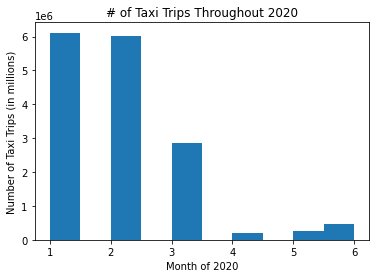

In [38]:
# of taxi trips MoM

taxi2020['month'].plot(kind='hist');
plt.title("# of Taxi Trips Throughout 2020");
plt.xlabel("Month of 2020");
plt.ylabel("Number of Taxi Trips (in millions)");

plt.show()

In [39]:
# group by month for number of trips

taxi2020.groupby('month').size().sort_values(ascending = False)

month
1    6114226
2    6022925
3    2851222
6     463878
5     266422
4     202842
dtype: int64

### Hypothesis #1
**Trips drop in March due to the WFH protocol**

In [40]:
# creating a month list

month = []
for mon in taxi2020['month'].unique():
    month.append(mon)
    
print(month)

[1, 2, 3, 4, 5, 6]


In [41]:
# creating a trips list 

trips = []

for value in taxi2020.groupby('month').size():
    trips.append(value)
    
print(trips)

[6114226, 6022925, 2851222, 202842, 266422, 463878]


In [42]:
# finding the difference in trips MoM

print(month)
print(trips)
print('---------------')

difference = []
index = 0

for value in trips[1:]:
    diff = abs(trips[index] - value)
    difference.append(diff)
    print(f'Difference from month {month[index]} to month {month[index + 1]}: {diff}')
    index += 1

[1, 2, 3, 4, 5, 6]
[6114226, 6022925, 2851222, 202842, 266422, 463878]
---------------
Difference from month 1 to month 2: 91301
Difference from month 2 to month 3: 3171703
Difference from month 3 to month 4: 2648380
Difference from month 4 to month 5: 63580
Difference from month 5 to month 6: 197456


In [43]:
# finding the largest difference in trips MoM

max_diff_index = difference.index(max(difference))
max_diff = difference[max_diff_index]

# print(max_diff)
# print(difference[max_diff])
print(f'The largest difference in trips was {max_diff}, from month {month[max_diff_index]} to month {month[max_diff_index + 1]}.')

The largest difference in trips was 3171703, from month 2 to month 3.


In [44]:
# Creating a variable within the taxi2020 dataset to reflect just March data

mar_2020 = taxi2020[(taxi2020['tpep_pickup_datetime'] >= '2020-03-01') & (taxi2020['tpep_pickup_datetime'] <= '2020-03-31')]

mar_2020.tail()

,tpep_pickup_datetime,passenger_count,trip_distance,RatecodeID,payment_type,total_amount,date_only,month
31464,2020-03-10 08:11:02,1.0,1.70,1.0,2.0,9.80,2020-03-10,3
32189,2020-03-10 10:11:42,1.0,9.08,1.0,2.0,35.30,2020-03-10,3
32458,2020-03-10 10:48:24,1.0,1.92,1.0,2.0,14.80,2020-03-10,3
32674,2020-03-10 11:57:20,1.0,2.10,1.0,1.0,19.24,2020-03-10,3
32675,2020-03-10 12:25:14,1.0,0.59,1.0,1.0,9.10,2020-03-10,3


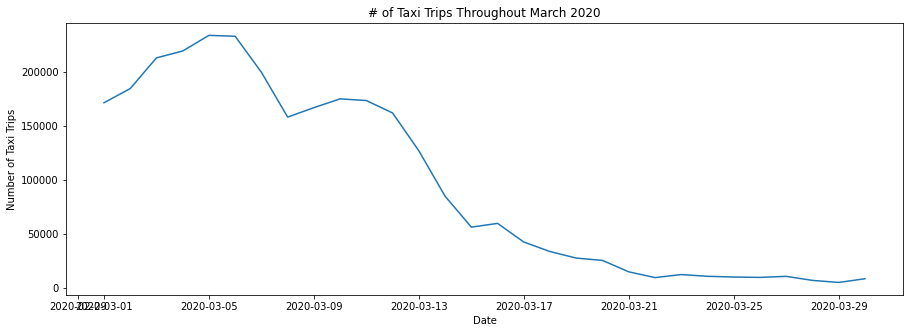

In [45]:
plt.figure(figsize=(15,5));
plt.plot(mar_2020['date_only'].value_counts().sort_index());
plt.title("# of Taxi Trips Throughout March 2020");
plt.xlabel("Date");
plt.ylabel("Number of Taxi Trips");

In [46]:
# since March (3/16) was when wfh was implemented, let's check trips 1H vs 2H of March

mar_1h = taxi2020[(taxi2020['tpep_pickup_datetime'] >= '2020-03-01') & (taxi2020['tpep_pickup_datetime'] <= '2020-03-15')]
mar1h_trips = mar_1h['tpep_pickup_datetime'].count()
print(f'Trips 1H March: {mar1h_trips}\n')
print(mar_1h.groupby('month')[['trip_distance', 'total_amount']].mean())

print('---------------------------------------')

mar_2h = taxi2020[(taxi2020['tpep_pickup_datetime'] >= '2020-03-16') & (taxi2020['tpep_pickup_datetime'] <= '2020-03-31')]
mar2h_trips = mar_2h['tpep_pickup_datetime'].count()
print(f'Trips 2H March: {mar2h_trips}\n')
print(mar_2h.groupby('month')[['trip_distance', 'total_amount']].mean())

Trips 1H March: 2500345

       trip_distance  total_amount
month                             
3           2.823188     18.315634
---------------------------------------
Trips 2H March: 286464

       trip_distance  total_amount
month                             
3           3.014853     16.996811


In [47]:
# How many less trips in 2H March?

print("{:,}".format(abs(mar2h_trips - mar1h_trips)), 'less trips in 2H March')
print('2H March had', str(round(mar2h_trips / (mar2h_trips + mar1h_trips) * 100)), '% of the total trips in March')

2,213,881 less trips in 2H March
2H March had 10 % of the total trips in March


In [48]:
# How much of a change in trips from 1H to 2H?

change_march_trips = mar1h_trips / mar2h_trips
print(change_march_trips)

8.728304429177838


**--> INSIGHT:** Trips drastically dropped by almost 9x in the 2H of March, achieving only 10% of overall March trips. Average trip distance increased in 2H March, whereas trip amounts saw a slight decrease, however this could potentially be relative to the number of trips taken in 2H March.

### Hypothesis #2
**Trips to increase again in June, as that's when NYC begins to reopen and enter Phase 1 (6/8) + Phase 2 (6/22)**

In [49]:
# Creating a variable within the taxi2020 dataset to reflect just June data

jun_2020 = taxi2020[(taxi2020['date_only'] >= '2020-06-01') & (taxi2020['date_only'] <= '2020-06-30')]

jun_2020.tail()

,tpep_pickup_datetime,passenger_count,trip_distance,RatecodeID,payment_type,total_amount,date_only,month
499038,2020-06-30 23:07:00,1.0,1.06,1.0,2.0,12.42,2020-06-30,6
499039,2020-06-30 23:24:49,1.0,1.52,1.0,1.0,10.56,2020-06-30,6
499040,2020-06-30 23:57:38,1.0,13.36,1.0,2.0,44.92,2020-06-30,6
499041,2020-06-30 23:08:03,1.0,2.23,1.0,2.0,14.80,2020-06-30,6
499042,2020-06-30 23:06:50,1.0,1.43,1.0,1.0,14.13,2020-06-30,6


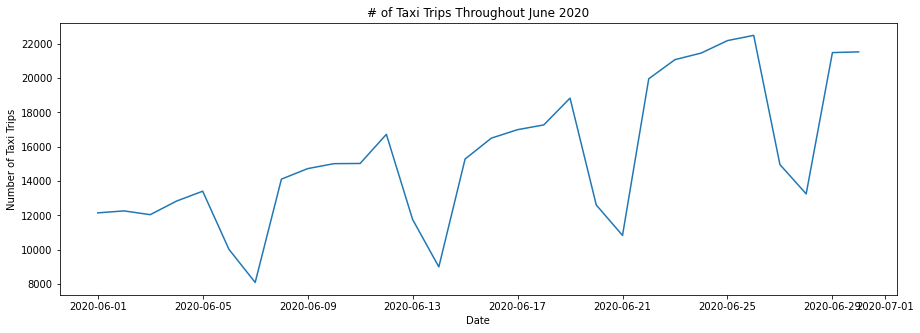

In [50]:
plt.figure(figsize=(15,5));
plt.plot(jun_2020['date_only'].value_counts().sort_index());
plt.title("# of Taxi Trips Throughout June 2020");
plt.xlabel("Date");
plt.ylabel("Number of Taxi Trips");

**--> INSIGHTS:** We see trip increases at 6/8 and 6/22 when NYC began to reopen for Phase 1 + 2. We also see a pattern in trips occur approx. 3.5 times throughout the month. There are dips around 6/6 - 6/7, 6/13 - 6/14, 6/20 - 6/21, and lastly 6/27 - 6/28. When comparing these approximate dates to the 2020 calendar, we notice that the dips occur during Saturday and Sunday (weekends). Despite the weekend dips, each lowest point of the dip gradually had a greater number of overall trips.

### Hypothesis #3
**The average trip distance and total amount to increase, as people would potentially prefer taking taxis over public transportation**

In [51]:
# group by month for trip distance and/or price MoM

taxi2020.groupby('month')[['trip_distance', 'total_amount']].mean()

,trip_distance,total_amount
month,,
1,2.881262,18.427237
2,2.819383,18.428506
3,2.854207,18.174045
4,2.690671,15.418834
5,2.787820,15.960645
6,2.917333,16.999032


**--> INSIGHTS:** Although we saw that the number of trips drastically decreased from February to March, the month's overall trip distance and trip amounts were relatively consistent MoM. This could potentially be due to majority of trips occurring in 1H March (90%), therefore driving consistent trip distance and trip amount.

We also see trip distance and trip amounts at its lowest in April, relative to the number of the month's total trips. However, when trips began to increase again in June, we see trip distance and trip amounts exceed that of pre-WFH months (Jan + Feb), despite having drastically lower trips

### Hypothesis #4
**Single passengers to show an increase MoM vs. Group riders due to social distancing measures**

In [52]:
# Creating a single-passenger dataframe

single = taxi2020[taxi2020['passenger_count'] == 1]

In [53]:
single.groupby('month')[['passenger_count']].size()

month
1    4457388
2    4411772
3    2141734
4     169342
5     216856
6     368726
dtype: int64

In [54]:
# Creating a single-passenger list

single_riders = []
for value in single.groupby('month').size():
    single_riders.append(value)
    
print(f'Single Riders List MoM: {single_riders}')

# total trips from earlier list in Hypothesis #1:
print(f'Total Trips MoM: {trips}')

Single Riders List MoM: [4457388, 4411772, 2141734, 169342, 216856, 368726]
Total Trips MoM: [6114226, 6022925, 2851222, 202842, 266422, 463878]


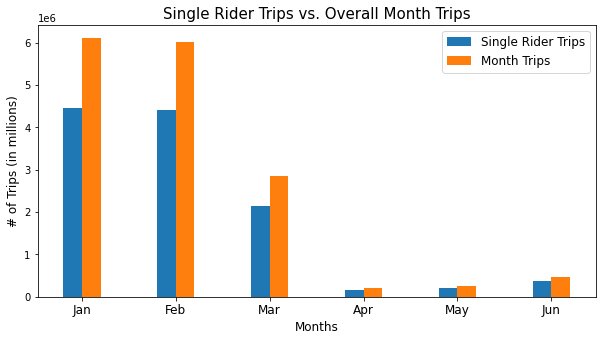

In [55]:
# Visualizing Single Riders and Total Month Trips side by side

# Position of bars on x-axis
ind = np.arange(len(month))

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.2   

# Plotting
plt.bar(ind, single_riders , width, label='Single Rider Trips')
plt.bar(ind + width, trips, width, label='Month Trips')

plt.xlabel('Months', fontsize=12)
plt.ylabel('# of Trips (in millions)', fontsize=12)
plt.title('Single Rider Trips vs. Overall Month Trips', fontsize=15)

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'), fontsize=12)

# Finding the best position for legends and putting it
plt.legend(loc='best', fontsize=12)
plt.show()

In [56]:
# Percentage of Single Riders MoM

trip_index = 0
month_index = 1
mom_single = {}

for single in single_riders:
    mom_single[month_index] = str(round(single / trips[trip_index] * 100)) + '%'
    trip_index += 1
    month_index += 1
    
print(mom_single)

{1: '73%', 2: '73%', 3: '75%', 4: '83%', 5: '81%', 6: '79%'}


**--> INSIGHTS:** In April, when trips were lowest, we see an increase in the percentage of single riders in relation to the total trips made in April. This trend continues in May and June, respective to the months' total trips. Visually, we see the gaps between Single Rider vs overall month trips become smaller MoM.

### Challenges Encountered

- A lot of varying trip_distance vs trip_amount
    - For example, 3 mi trip distance would be `$7.50` for one record, but `$55` for another record
- A lot of possible human error when entering the data, which could've potentially skewed data if not cleaned/filtered properly
    - For example, a large number of 0 passenger trips or 0 mi trips

### Conclusion / Key Takeaways

1. **TRUE: Trips drop in March due to the WFH COVID protocol**
    - Specifically in the 2H of March, where the number of Yellow Taxi trips drop drastically by almost 9x in the 2H of March, achieving only 10% of overall March trips
2. **TRUE: Trips to increase again in June, as that's when NYC begins to reopen and enter Phase 1 (6/8) + Phase 2 (6/22)**
    - Additionally, the number of trips began to develop a pattern this month, with trip dips during the Weekends, as typical travelers are throughout the Weekdays, potentially front-line healthcare workers or essential business workers
    - Another potential increase in trips in June could be due to BLM protests
3. **DEPENDS: The average trip distance and total amount to increase, as people would potentially prefer taking taxis over public transportation**
    - Overall trip distance and trip amounts lower during COVID months April and May vs. Jan and Feb. However, the lower average numbers corresponds to the significantly lower number of trips during those months. When trips began to increase again in June, trip distance and trip amounts exceed that of pre-WFH months (Jan + Feb), despite having drastically lower trips
4. **TRUE: Single passengers to show an increase MoM vs. Group riders, potentially due to social distancing measures**
   - Single passenger rider percentage was at 73% for months prior to the WFH protocol (Jan and Feb). The percentage largely increase by +10% in April (83%), when there were the least Yellow Taxi trips made. In the latter months of 2020, single rider percentages remain greater than the percentages pre-WFH (May: 81% and June: 79%).

### Future Analysis/Refinements
- Analyze from another perspective (trip duration) by keeping column `tpep_dropoff_datetime`
- Take a deeper look into trip_distance vs. trip_amount to properly filter and clean data, respective to `RatecodeID`
    - Deeper dive into `RatecodeID` and how trips differed for each code ID
- Further analyze trip duration of single riders MoM

### Additional Resources:

More information on NYC Phase Reopens and BLM timeline:
- https://www.nytimes.com/article/new-york-phase-reopening.html
- https://www.nytimes.com/article/george-floyd-protests-timeline.html?auth=login-google
- https://en.wikipedia.org/wiki/George_Floyd_protests_in_New_York_City

Last Updated: 10/29/20